<a href="https://colab.research.google.com/github/DivyaNarayan0613/Cardio/blob/main/Lung_Cancer_Detection_Classification_Pytorch_Project_Image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.


tf. function is a decorator function provided by Tensorflow 2.0 that converts regular python code to a callable Tensorflow graph function, which is usually more performant and python independent. It is used to create portable Tensorflow models.

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.

matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

PyTorch is a Python package that provides two high-level features:

    Tensor computation (like NumPy) with strong GPU acceleration
    Deep neural networks built on a tape-based autograd system

You can reuse your favorite Python packages such as NumPy, SciPy, and Cython to extend PyTorch when needed.



At a granular level, PyTorch is a library that consists of the following components:


torch - a Tensor library like NumPy, with strong GPU support

torch.nn - a neural networks library deeply integrated with autograd designed for maximum flexibility

torch.nn.functional - has all convulutional functions which can connect different layers




torch.optim is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can be also easily integrated in the future.



Torchvision is a library for Computer Vision that goes hand in hand with PyTorch. It has utilities for efficient Image and Video transformations, some commonly used pre-trained models, and some datasets ( torchvision does not come bundled with PyTorch , you will have to install it separately. )

Transforms are common image transformations available in the torchvision.transforms module.

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.



At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset, with support for

    map-style and iterable-style datasets,

    customizing data loading order,

    automatic batching,

    single- and multi-process data loading,

    automatic memory pinning.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dataset


from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import zipfile

In [ ]:
from zipfile import ZipFile

In [ ]:
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/Lungcancer.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
os.listdir('/tmp/Lung cancer')

['lung_colon_image_set']

In [ ]:
len(os.listdir('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets/lung_aca'))

5000

In [ ]:
len(os.listdir('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets/lung_n'))

5000

In [ ]:
len(os.listdir('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets/lung_scc'))

5000

In [ ]:
df1 = r'/tmp/Lung cancer/lung_colon_image_set/lung_image_sets'

Transforming and Augmenting the images

Transforms are common image transformations available in the torchvision.transforms module. They can be chained together using Compose.

The transformations that accept tensor images also accept batches of tensor images. A Tensor Image is a tensor with (C, H, W) shape, where C is a number of channels, H and W are image height and width. A batch of Tensor Images is a tensor of (B, C, H, W) shape, where B is a number of images in the batch.

The expected range of the values of a tensor image is implicitly defined by the tensor dtype. Tensor images with a float dtype are expected to have values in [0, 1). Tensor images with an integer dtype are expected to have values in [0, MAX_DTYPE] where MAX_DTYPE is the largest value that can be represented in that dtype.

Randomized transformations will apply the same transformation to all the images of a given batch, but they will produce different transformations across calls.



Transforms on PIL Image and torch.*Tensor

Compose(transforms) - Composes several transforms together.

CenterCrop(size) - Crops the given image at the center.

ColorJitter([brightness, contrast, …]) - Randomly change the brightness, contrast, saturation and hue of an image.

RandomHorizontalFlip([p]) -

Horizontally flip the given image randomly with a given probability.

RandomRotation(degrees[, interpolation, …]) - Rotate the image by angle.

Resize(size[, interpolation, max_size, …]) -

Resize the input image to the given size.

ToTensor() - Convert a PIL Image or numpy.ndarray to tensor.

PIL means Python imaging library that adds support for opening, manipulating, and saving many different image file formats.


In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(),
    transforms.ToTensor()
])

Dataset is an abstract class representing a dataset.

ImageFolder returns Dataset object with contains tuples => (image, class)

path where the dataset lies in the drive is mentioned in the quotes

In [ ]:
data = dataset.ImageFolder('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets' , transform = transform)

len(dataset) returns the size of the dataset.

Since this is a small dataset, 90% of the dataset is used for training and 10% of the dataset is used for testing

In [ ]:
datalen = len(data)
dataidx = np.array(list(range(datalen)))
np.random.shuffle(dataidx)

splitfrac = 0.9
split_idx = int(splitfrac * datalen)
train_idxs = dataidx[:split_idx]
valid_idxs = dataidx[split_idx:]

testsplit = 0.1
testidxs = int(testsplit * len(train_idxs))


test_idxs = train_idxs[:testidxs]
train_idxs = train_idxs[testidxs:]

np.random.shuffle(test_idxs)

The training dataset is made into a batch size of 30

In [ ]:
batch_size = 30

In [ ]:
len(data)

15000

In [ ]:
len(data)/batch_size

500.0

We have dataset images for lung adenocarcinoma, squamous cell carcinoma and benign tissues.

In [ ]:
data.classes

['lung_aca', 'lung_n', 'lung_scc']

The entire dataset is divided into training, validation data and testing data. 90% of the training dataset is further divided as training  and validation, remaining 10% of the dataset is testing data

In [ ]:
train_samples = torch.utils.data.SubsetRandomSampler(train_idxs)
valid_samples = torch.utils.data.SubsetRandomSampler(valid_idxs)
test_samples  = torch.utils.data.SubsetRandomSampler(test_idxs)
dataloader = DataLoader(data , batch_size = batch_size , sampler = train_samples)
validloader = DataLoader(data , batch_size = batch_size ,sampler = valid_samples)
testloader  = DataLoader(data , batch_size = batch_size , sampler = test_samples)

Since the dataset is made into batches of 30, the first 30 images of the training data is displayed for our visualization purpose.

Since machine learning handles only numerical data, they are converted into array(vectors). Both images and labels associated to them are convereted to numpy array.

Size of the image is mentioned to be 25 X 4 in width and height.

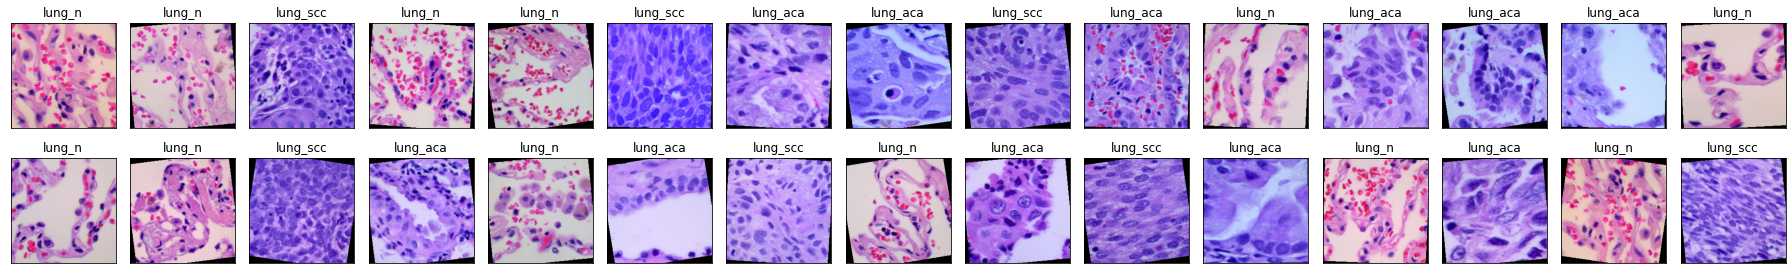

In [ ]:


images , labels = iter(dataloader).next()
images , labels = images.numpy() , labels.numpy()

fig = plt.figure(figsize = (25,4))

for i in range(batch_size):
    ax = fig.add_subplot(2 , batch_size/2 , i+1 , xticks = [] , yticks = [])
    ax.imshow(images[i].transpose(2,1,0).squeeze())
    ax.set_title(data.classes[labels[i]])

plt.tight_layout()



The pretrained model used here for classification purpose is VGG 16.

Applies a linear transformation to the incoming data: y=x A^T + b

A^T is to be read as A to the power T

In [ ]:
from torchvision import models
model = models.vgg16(pretrained = True)


# Parameters -> Do not perform gradient decent -> Freeze

for param in model.parameters():
    param.no_grad_ = True

model.classifier[6] = nn.Linear(4096 , 3)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

model. cuda() will push the parameters to the default device.model.cuda() by default will send your model to the "current device", which can be set with torch.cuda.set_device(device)

In [ ]:
model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

nn.CrossEntropyLoss().cuda() - This criterion computes the cross entropy loss between input and target.



torch.optim is a package implementing various optimization algorithms. Here it implements Adam algorithm.

In [ ]:


criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters() , lr = 1e-5)



In [ ]:
%timeit
n_epochs = 1

for e in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    min_valid_loss = np.inf
    model.train()
    for batch_idx , (data , target) in enumerate(dataloader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output , target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    for batch_idx , (data , target) in enumerate(validloader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output , target)
        valid_loss += loss.item()


    train_loss = train_loss / len(dataloader)
    valid_loss = valid_loss / len(validloader)
    print("Epoch : {} , Batch : {} , Loss : {}".format(e+1 , batch_idx , train_loss))

    if valid_loss < min_valid_loss:
        print("Valid Loss decreased from {} ---> {}".format(min_valid_loss , valid_loss))
        torch.save(model.state_dict() , "model_lung_canc.pt")
        min_valid_loss = valid_loss

Epoch : 1 , Batch : 49 , Loss : 0.18795626463632983
Valid Loss decreased from inf ---> 0.06239949435926974


The NVIDIA System Management Interface (nvidia-smi) is a command line utility, based on top of the NVIDIA Management Library (NVML), intended to aid in the management and monitoring of NVIDIA GPU devices

In [ ]:
!nvidia-smi

Mon May 30 04:05:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    31W /  70W |   9588MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def test(loaders, model, criterion, use_cuda  = True):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

Testing dataset loss and accuracy

In [ ]:
test(testloader, model, criterion, use_cuda  = True)

Test Loss: 0.059500


Test Accuracy: 97% (1320/1350)


The output is seen here along with the misclassified label

The output in the red color is the misclassified image label

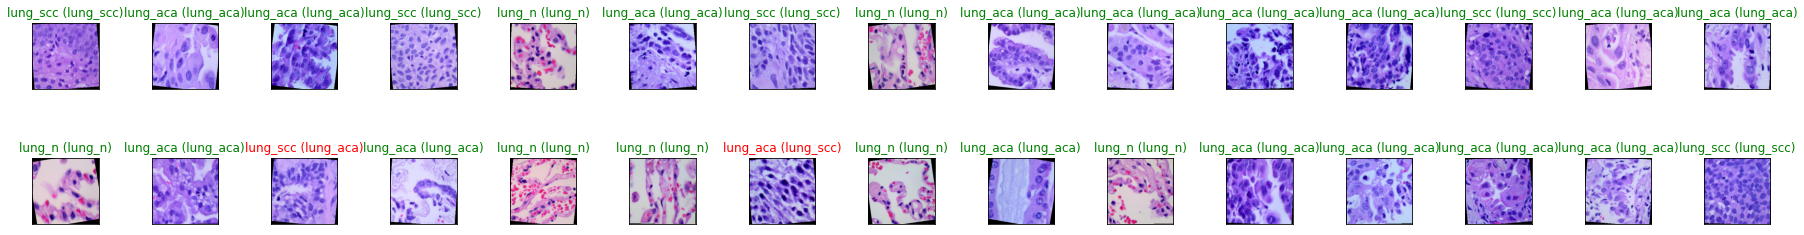

In [ ]:


dataiter = iter(testloader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(model(images.cuda()).data.max(1, keepdim=True)[1].cpu().numpy())
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].transpose(1,2,0)), cmap='gray')
    ax.set_title("{} ({})".format(data.classes[preds[idx]], data.classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))
plt.tight_layout()

